## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 1: Cardio Good Fitness Data Exploration</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
The data is about customers of the treadmill product(s) of a retail store called <b>Cardio Good Fitness</b>. This Dashboards explores the CSV data provided, generate key business insights identifying customer profiles and recommendations on the actions the company could take when targeting new customers.
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Import necessary libraries and Load Data</li>
    <li>Import necessary libraries and Load Data</li>
    <li>Univariate Data Analysis</li>
    <li>Checking distribution of data</li>
    <li>Multivariate Data Analysis</li>
    <li>Conclusion and Recommendations</li>
</ol>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')                  # Ignore/Do not display warnings

sns.set(color_codes=True)                          # Displays charts with background colors
%matplotlib inline

main_data= pd.read_csv('CardioGoodFitness.csv');   # Load the data

 <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Set Up Dashboard Theme:

In [2]:
default_colors = ["#4FC3F7","#E65100", "#E91E63", "#1B5E20"]       # Set red and blue for good and bad colors.
gender_palette = {"Female":"#E91E63", "Male":"#42A5F5"}            # Set of gender based color palette map (pink, blue).

sns.set_theme(
    context="notebook",                                            # Sets default size for charts. 
    font_scale=1.5,                                                # Default font size .
    style="darkgrid");                                             # Dashboard chart background style.

sns.set_palette(sns.color_palette(default_colors))                 # Initialize defaultcolor palette for the notebook charts

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Overview of The Data Attributes:

&nbsp;
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data is made up of 180 rows and 9 columns.</li>
    <li>6 columns contain discrete data and theother 3 categorial data.</li>
    <li>The data has no null values.</li>
    <li>Another noticeable difference is a higher average income and mileage for males as compared to females.</li>
</ul>

In [3]:
main_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
nulls_series             = main_data.isna().sum()         # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
column_datatypes         = main_data.dtypes               # Get a series containing data types for each column 

nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, column_datatypes],    # Combine the series created above into a dataframe.
    axis=1,                                               # Concatenate using columns as axis. 
    keys=["Nulls", "Non-Nulls", "Type"],                  # Add Columns as for the nulls and non-nulls values
    sort=True)

print("Rows x Columns = " + str(main_data.shape) + "\n")  # Print out the dimensions of the data frame
print(nulls_count_df)                                     # Display the nulls count table

Rows x Columns = (180, 9)

               Nulls  Non-Nulls    Type
Age                0        180   int64
Education          0        180   int64
Fitness            0        180   int64
Gender             0        180  object
Income             0        180   int64
MaritalStatus      0        180  object
Miles              0        180   int64
Product            0        180  object
Usage              0        180   int64


In [5]:
main_data['Gender'].value_counts() # Count number of females and males in the dataset.

Male      104
Female     76
Name: Gender, dtype: int64

In [6]:
main_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
main_data.groupby(['Gender']).mean() # Eplore mean by Gender for each column 

,Age,Education,Usage,Fitness,Income,Miles
Gender,,,,,,
Female,28.565789,15.394737,3.184211,3.026316,49828.907895,90.013158
Male,28.951923,15.701923,3.653846,3.519231,56562.759615,112.826923


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Univariate Data Analysis:


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.1 Exploring Categorial Variables</span>
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations:
<ul>
    <li>Gender profiles are only divided into male and female.</li>
    <li>Cardio Good Fitness has only three products: TM195, TM498 and TM798</li>
    <li>The data shows a difference of 31% more male customers than female customers.</li>
    <li>Most of the customers are in the age range of 20-30 years old.</li>
    <li>Looks like there are some males who prefer threadmill TM798 more than other products</li>
    <li>Another observation is a higher number of married customers (both male and female)</li>
</ul>

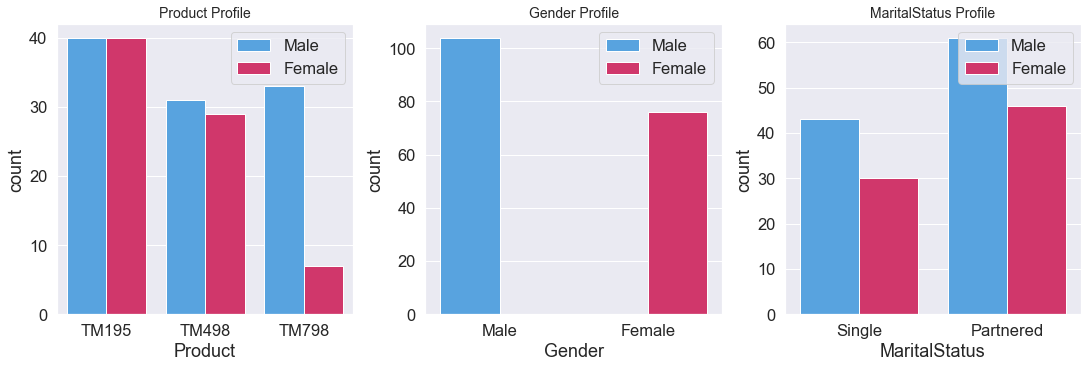

In [8]:
fig, axs = plt.subplots(
    nrows=1,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_cartegorial_charts(ax, df_column_name):                            # Helperfunction, creates a count plot and puts it on the grid on the given axis
    ax = sns.countplot(                                                     # Create the count plot
        data=main_data,                                                     # Use the original data frame
        x=main_data[df_column_name],                                        # Use the column name passed in to get the series/values of that column
        hue="Gender",                                                       # Split the visual into Male and Female
        palette=gender_palette,                                             # Use gender specific colors (pink and blue)
        ax=ax)                                                              # Plot on the given axis 
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart. 
    ax.legend(loc='upper right')                                            # Put the legend of the chart on the top right.

categorial_data_column_names = ['Product', 'Gender', 'MaritalStatus']       # A list of categorial columns.
column_names_index = 0;                                                     # Index variable used to loop

for ax in axs.flat:                                                         # Go through every axis on the grid and plota chart on it.
    plot_cartegorial_charts(ax, categorial_data_column_names[column_names_index])
    column_names_index = column_names_index + 1

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.3 Exploring Continous Variables</span>
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Observations:
<ul>
    <li>Gender profiles are only divided into male and female.</li>
    <li>Cardio Good Fitness has only three products: TM195, TM498 and TM798</li>
    <li>The data shows a difference of 31% more male customers than female customers.</li>
    <li>Most of the customers are in the age range of 20-30 years old.</li>
</ul>

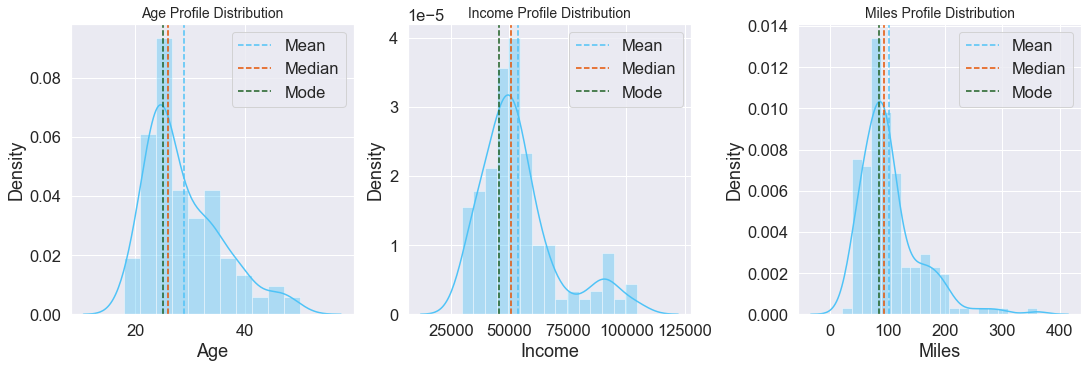

In [9]:
fig, axs = plt.subplots(
    nrows=1,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_distribution_chart(ax, df_column_name):                            # Plot the probability density grap on the given axis
    ax = sns.distplot(main_data[df_column_name], ax=ax);                    # Plot the distribution chart on the given axis
    ax.set_xlabel(df_column_name)                                           # Set the X-Axis label
    ax.set_title(df_column_name + ' Profile Distribution', fontsize=14)     # Set the title of the chart
    
    ax.axvline(main_data[df_column_name].mean(),                            # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=default_colors[0],                                     # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    ax.axvline(main_data[df_column_name].median(),                          # Plot the median line on the chart.
               color=default_colors[1],                                     # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    ax.axvline(main_data[df_column_name].mode()[0],                         # Plot the mode line on the chart.
               color=default_colors[3],                                     # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    ax.legend()
    
continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
column_names_index = 0

for ax in axs.flat:
    plot_distribution_chart(ax, continuous_data_column_names[column_names_index])
    column_names_index = column_names_index + 1

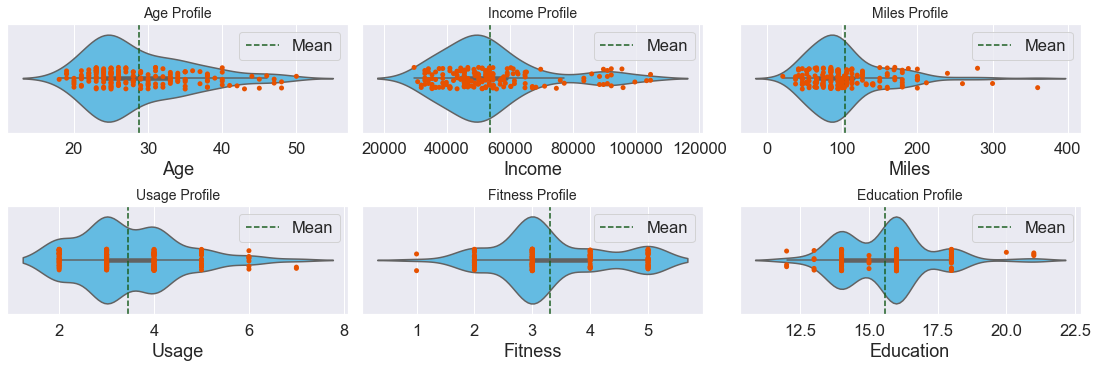

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,5), constrained_layout=True)

def plot_box_chart(ax, df_column_name):
    ax = sns.violinplot(x=df_column_name, data=main_data, ax = ax, kind="box")
    sns.stripplot(x=main_data[df_column_name], ax = ax, color=default_colors[1], jitter=True)
    ax.set_xlabel(df_column_name)
    ax.set_title(df_column_name + ' Profile', fontsize=14)
    ax.axvline(main_data[df_column_name].mean(), color=default_colors[3], label='Mean', linestyle="dashed");
    ax.legend()
    ax.legend(loc='upper right')

continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_box_chart(ax, continuous_data_column_names[count])
    count = count + 1

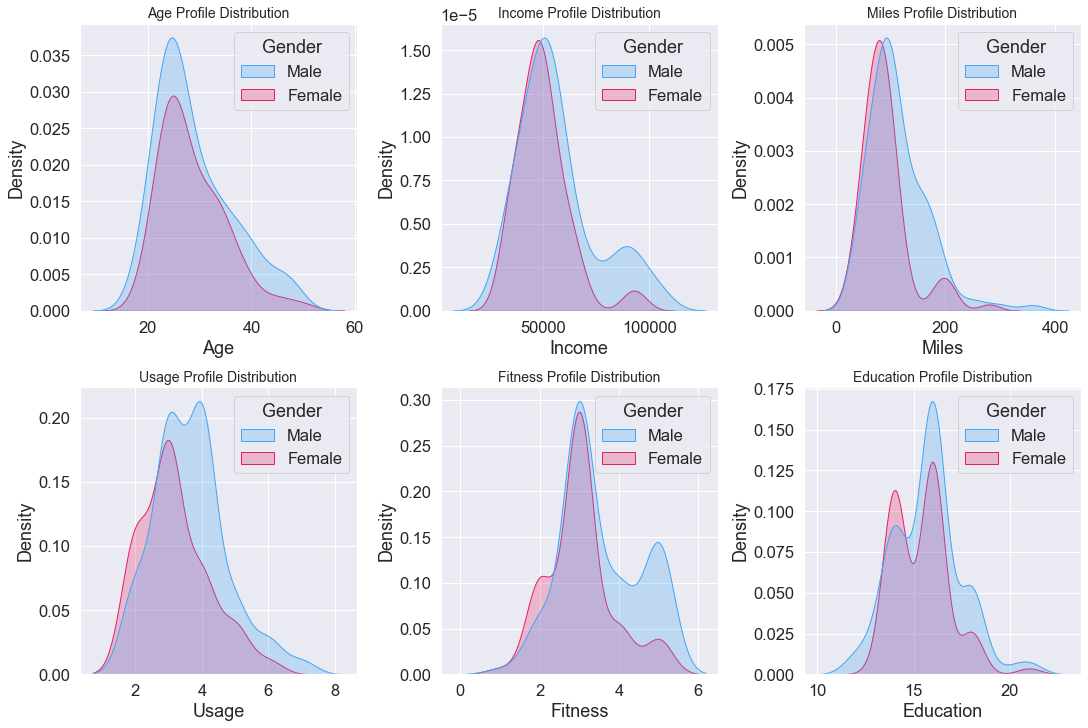

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)

def plot_distribution_chart(ax, df_column_name):
    ax = sns.kdeplot(main_data[df_column_name], ax=ax, palette=gender_palette, hue=main_data["Gender"], shade=True);
    ax.set_xlabel(df_column_name)
    ax.set_title(df_column_name + ' Profile Distribution', fontsize=14)
    
continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_distribution_chart(ax, continuous_data_column_names[count])
    count = count + 1

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Multivariate Data Analysis:
   
<p align="center">
Multivariate Data Analysis
</p>

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">3.2 Overview

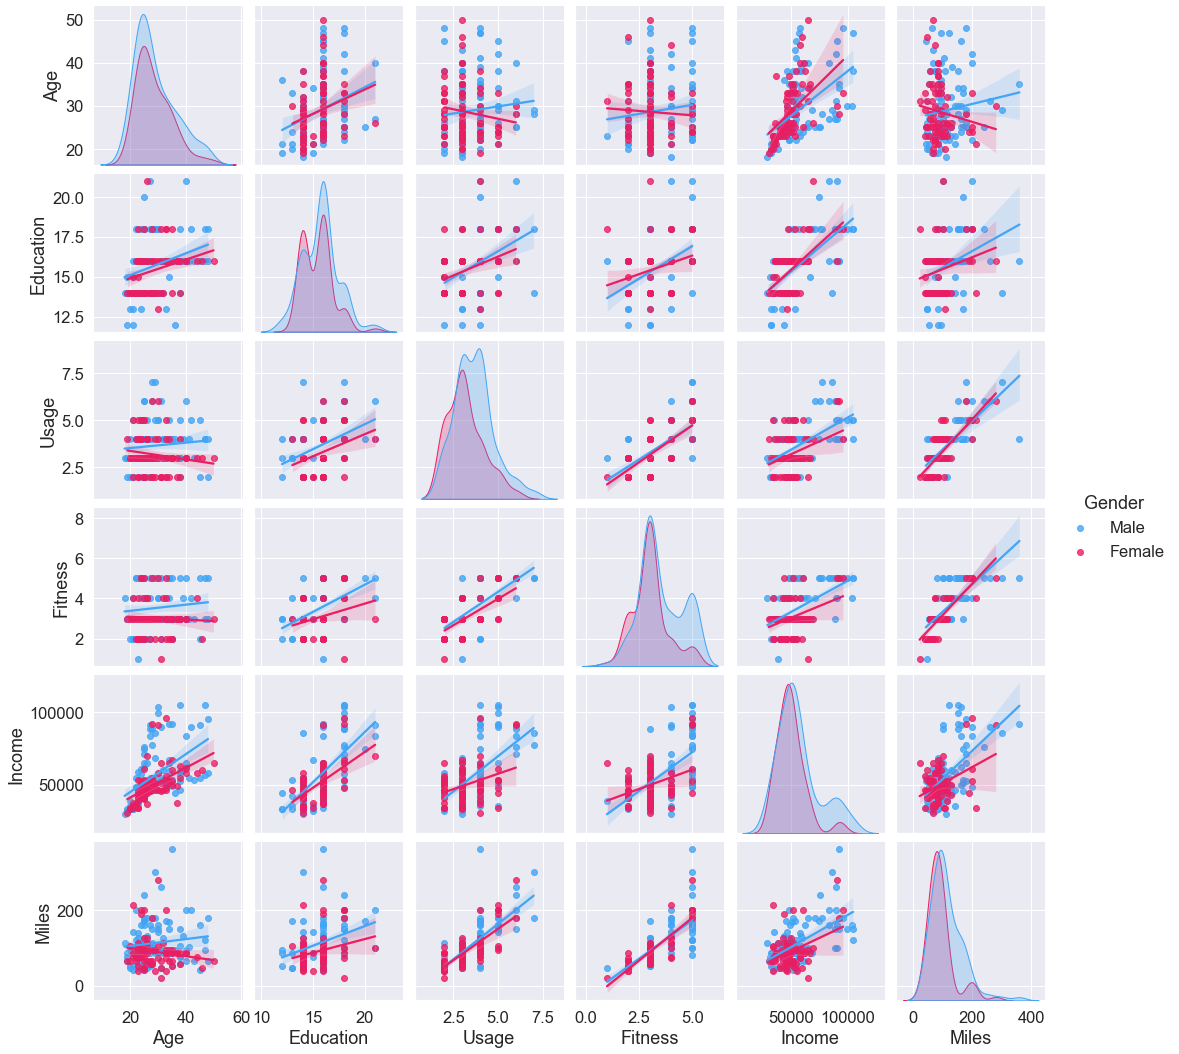

In [12]:
sns.pairplot(data=main_data, hue="Gender", kind="reg", palette=gender_palette);

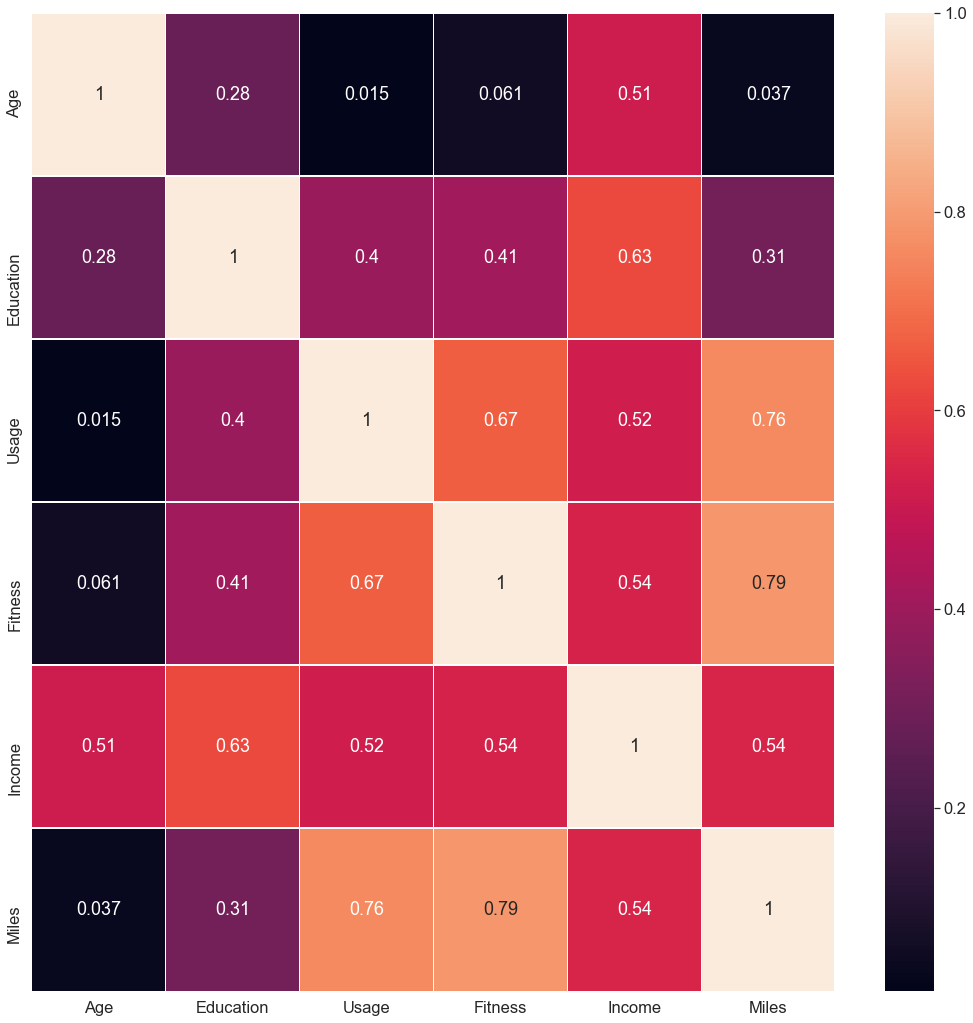

In [13]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

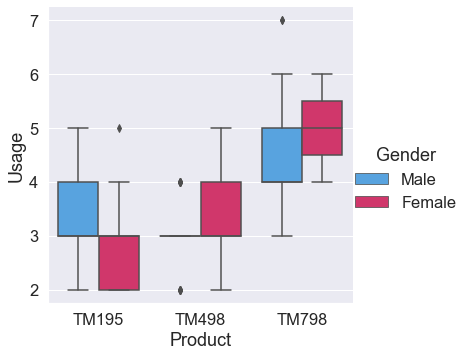

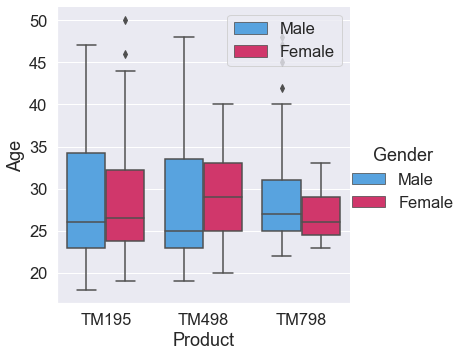

In [14]:
sns.catplot(data=main_data, x="Product", y="Usage", hue="Gender", kind="box", palette=gender_palette);
sns.catplot(data=main_data, x="Product", y="Age", hue="Gender", kind="box", palette=gender_palette);

plt.legend(loc='upper right')

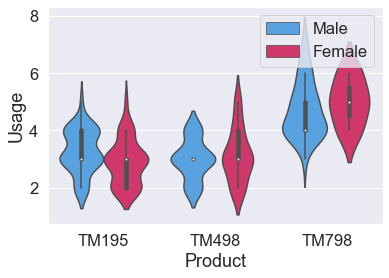

In [15]:
sns.violinplot(data=main_data, x="Product", y="Usage", hue="Gender", kind="box", palette=gender_palette);
plt.legend(loc='upper right')

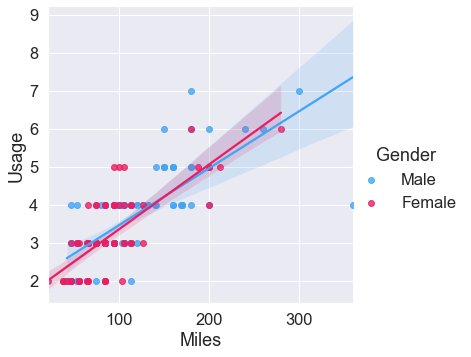

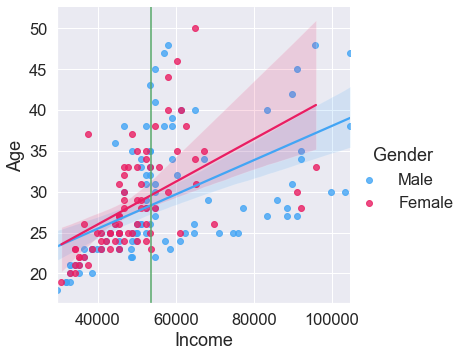

In [16]:
sns.lmplot(data=main_data, x="Miles", y="Usage", hue="Gender", palette=gender_palette);
sns.lmplot(data=main_data, x="Income", y="Age", hue="Gender", palette=gender_palette);
plt.axvline(main_data["Income"].mean(), color='g', label='{:5.0f}');

scatter
kde


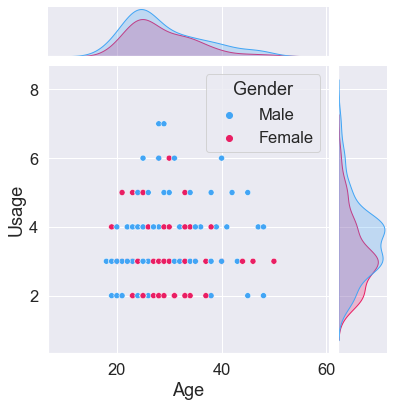

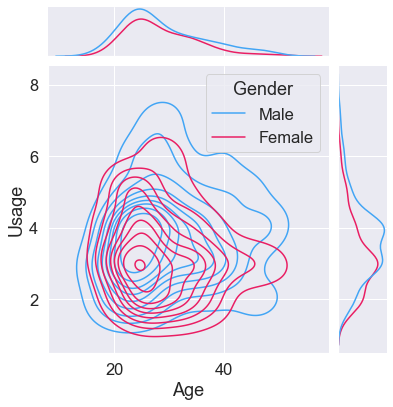

In [17]:
kinds = ['scatter', 'kde']

for chart_kind in kinds:
    print(chart_kind)
    sns.jointplot(data=main_data, x="Age", y="Usage", hue="Gender", kind=chart_kind, palette=gender_palette)

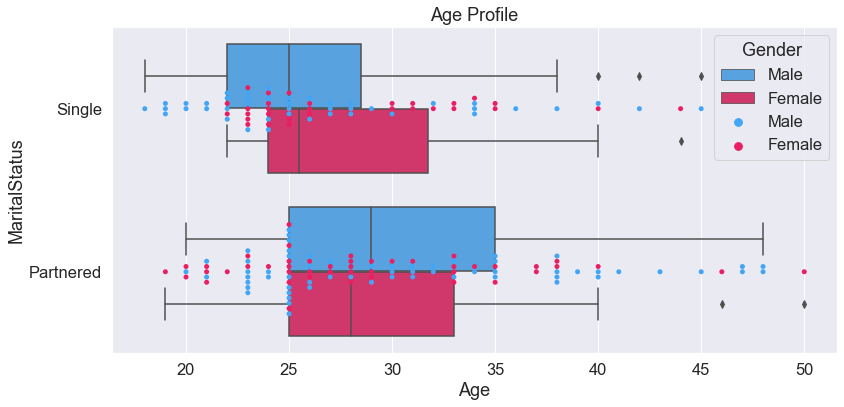

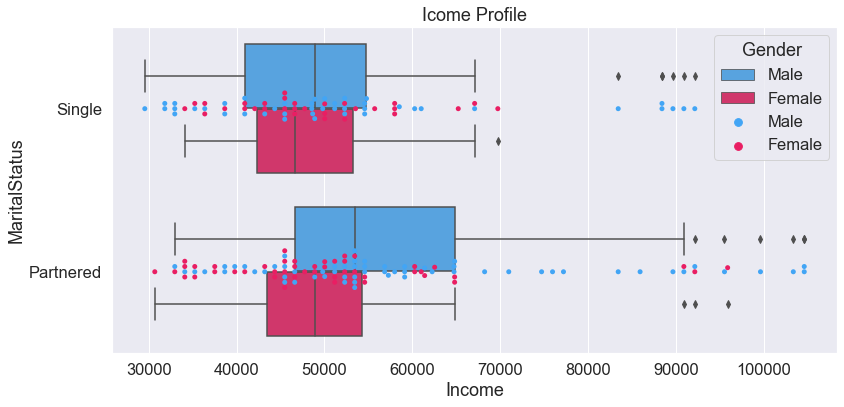

In [18]:
plt.subplots(figsize=(13, 6))                          # Set chart size
axs = sns.boxplot(x="Age",
            y="MaritalStatus",
            data=main_data,
            palette=gender_palette,
            hue="Gender")
axs.set_title("Age Profile")
sns.swarmplot(x=main_data['Age'], y=main_data['MaritalStatus'], hue=main_data['Gender'], palette=gender_palette)

plt.subplots(figsize=(13, 6))
axs = sns.boxplot(
            x="Income",
            y="MaritalStatus",
            data=main_data,
            palette=gender_palette,
            hue="Gender")
axs.set_title("Icome Profile")
sns.swarmplot(x=main_data['Income'], y=main_data['MaritalStatus'], hue=main_data['Gender'], palette=gender_palette)
plt.show()

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Recommendations:
   
<p align="center">
Multivariate Data Analysis
</p>